<a href="https://colab.research.google.com/github/lenonborges/PucMvp/blob/main/MVP_Projeto_1v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definição do Problema

Objetivo: entender e descrever claramente o problema que está sendo resolvido.

Qual é a descrição do problema?
- Otimizar a identificação de clientes mais propensos a deixarem de ser cliente.

Você tem premissas ou hipóteses sobre o problema? Quais?
- Hipótese que é possível através dos dados identificar os clientes mais propensos a fechar a conta e tomar alguma ação em cima disso.

Que restrições ou condições foram impostas para selecionar os dados?
- Dados vieram preparados do Kaggle, mas realizei a checagem de missing values e distribuição dos dados

Descreva o seu dataset (atributos, imagens, anotações, etc).
- Atributos do dataset são relacionados ao perfil de cada cliente


Importando Bibliotecas



In [ ]:
# configuração para não exibir os warnings import warnings
import warnings
warnings.filterwarnings('ignore')
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import recall_score

Acessando dados

In [ ]:
url = 'https://raw.githubusercontent.com/lenonborges/PucMvp/main/Customer-Churn-Records.csv'
df = pd.read_csv(url, index_col=False)

Visualizando o dataset

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


#Preparação de Dados

Objetivo: realizar operações de preparação dos dados.

- Separe o dataset entre treino e teste (e validação, se aplicável).

separei o dataset em treino e teste com o train test split e fiz a validaçao cruzada

- Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.

Apesar dos dados serem desbalanceados (variavel Exited 80% com valor 0 e 20% com valor 1), o nivel de desbalanceamento nao é extremo. Ainda assim, fiz a validação cruzada estratitificando pela variavel target.



- Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.

Usei a normalização pq a maioria dos dados tem uma distribuição nao normal.




- Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.

Retirei variaveis como sobrenome, id e rownumber por nao terem relaçao com a variavel target (Exited)

deletando colunas desnecessarias (variaveis que nao parecem contribuir para o modelo a priori)

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


#Exploração dos dados

Checando nulos e tipos de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

- Checando distribuicoes das variaveis categoricas

In [ ]:
df.groupby(['Exited','Geography'])['Geography'].count()

Exited  Geography
0       France       4203
        Germany      1695
        Spain        2064
1       France        811
        Germany       814
        Spain         413
Name: Geography, dtype: int64

In [ ]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Card Type'].value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

Checando balanceamento da variavel target

In [ ]:
df.Exited.value_counts()

## plotar p ficar mais claro

0    7962
1    2038
Name: Exited, dtype: int64



Abaixo podemos ver que tanto na classe 0 como na classe 1 as frequencias estao equilibradas

In [ ]:
df.groupby(['Exited','Card Type'])['Card Type'].count()

Exited  Card Type
0       DIAMOND      1961
        GOLD         2020
        PLATINUM     1987
        SILVER       1994
1       DIAMOND       546
        GOLD          482
        PLATINUM      508
        SILVER        502
Name: Card Type, dtype: int64

In [ ]:
df.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>],
       [<Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'Satisfaction Score'}>,
        <Axes: title={'center': 'Point Earned'}>]], dtype=object)

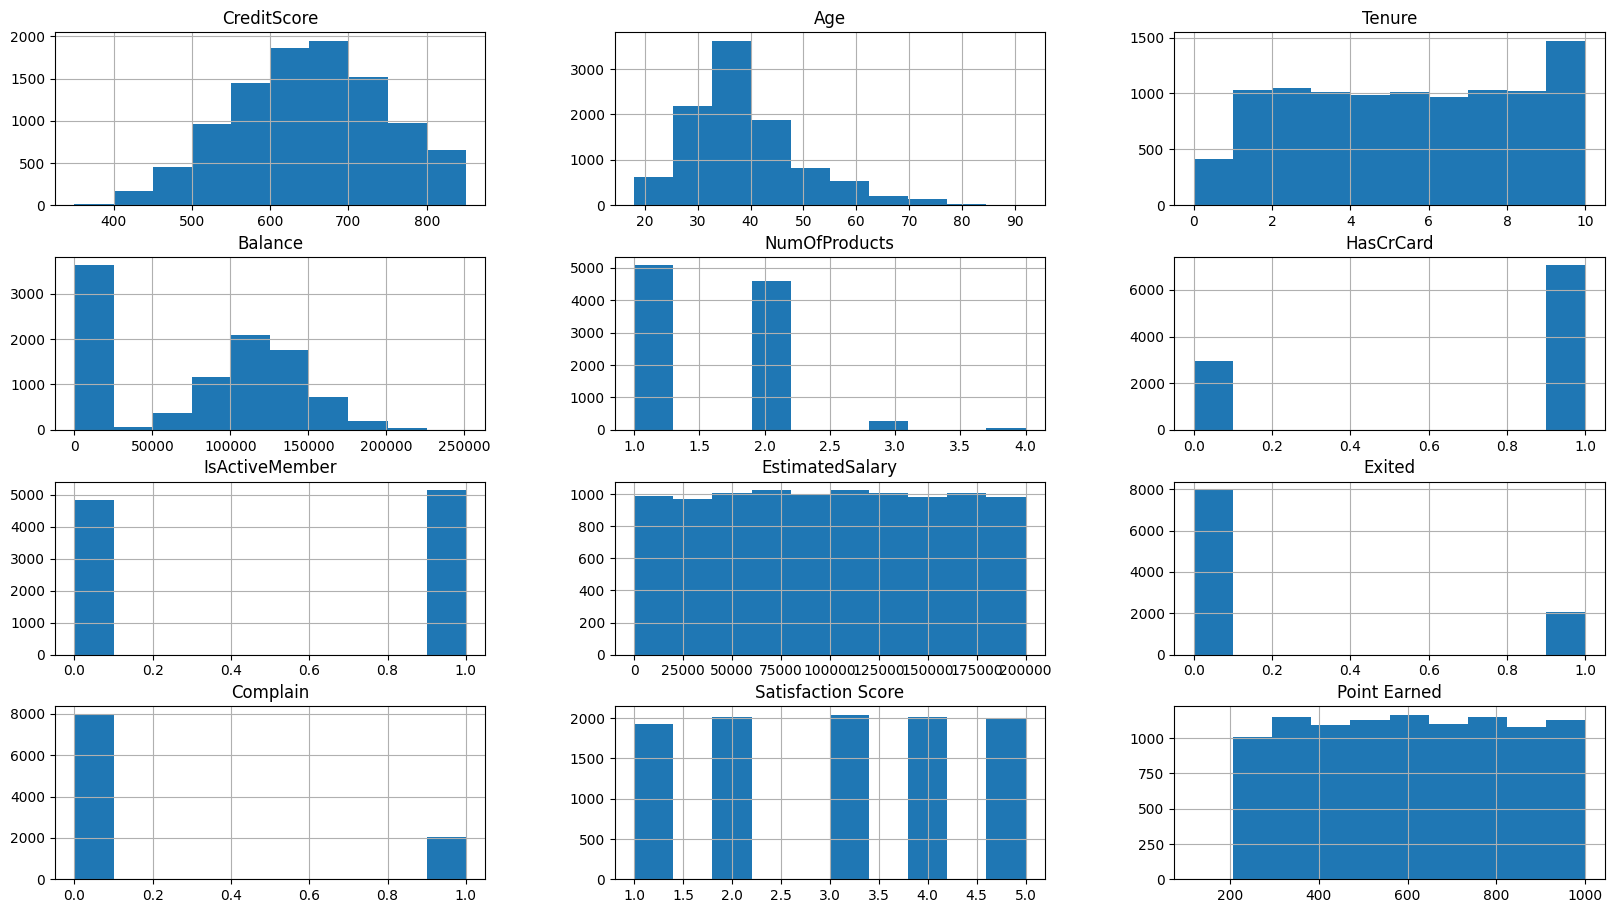

In [ ]:
df.hist(figsize=(20,11))


<Axes: >

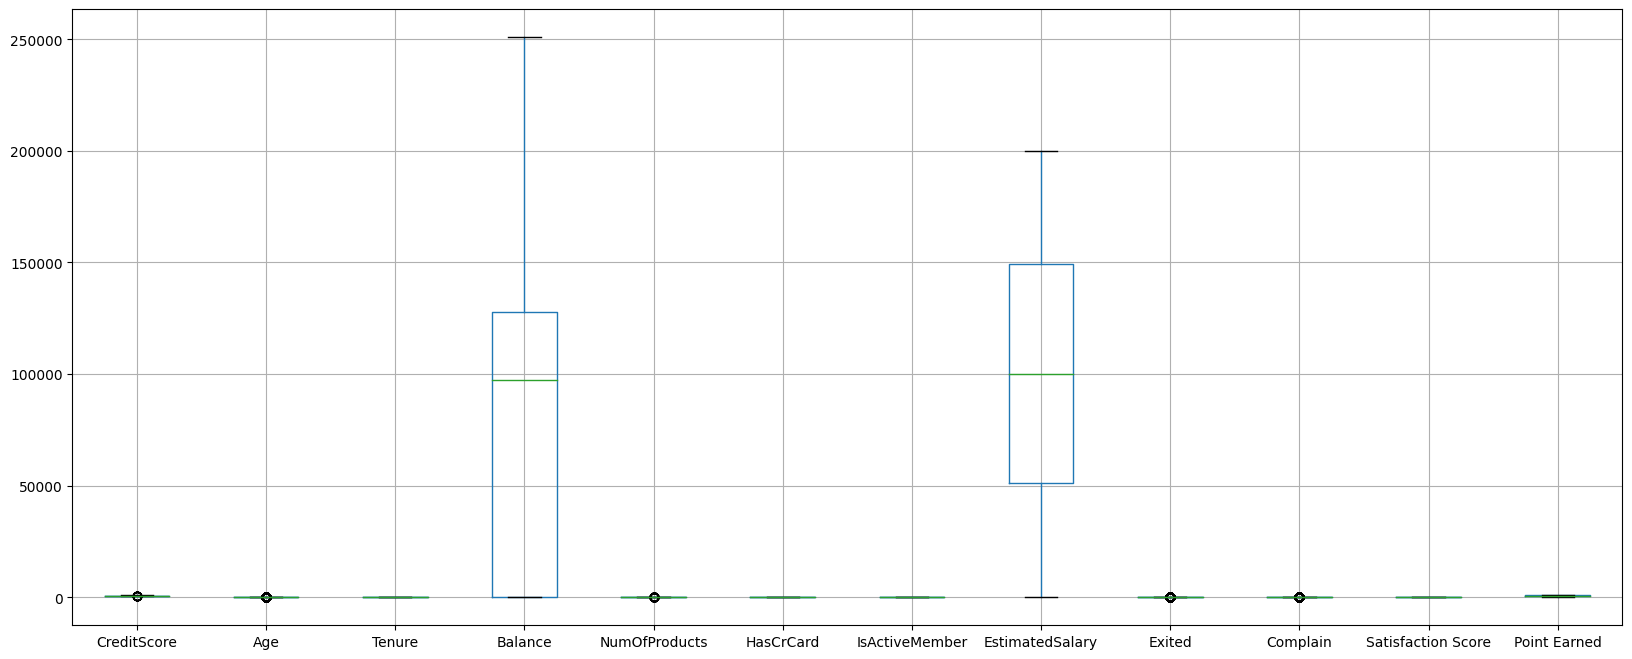

In [ ]:
df.boxplot(figsize=(20,8))


In [ ]:
#analisando correlaçao dos dados
df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628
Complain,-0.027048,0.283530,-0.013047,0.119124,-0.046357,-0.007095,-0.154741,0.012494,0.995693,1.000000,-0.004799,-0.002893


In [ ]:
#separando e retirando a variavel target
target = df['Exited']
df = df.drop(['Exited'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339


#Preparaçao dos dados.

Objetivo: realizar operações de preparação dos dados.

- Separe o dataset entre treino e teste (e validação, se aplicável).

Fiz em alguns blocos de texto abaixo

- Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.

Sim. O dataset nao é muito grande, nao é muito desbalanceado e nao tem dependencia temporal.


- Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.

Foram comparados os resultados com padronizaçao e normalizacao. Escolhi o ONE HOT ENCODING em vez do LABEL ENCODER pq nao existe relaçao ordinal entre as categorias.
obs; apesar da variavel card type ter uma relaçao ordinal,  diamond ser o mais caro. Nao tenho evidencias para supor que o cliente com plano mais caro ou mais barato possa ter mais chance de fechar a conta.


- Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.

Utilizei o SelectKBest para pegar as variaveis mais importantes





In [ ]:
#transformando Geography
label_encoder = LabelEncoder()
labels_pais = label_encoder.fit_transform(df[['Geography']])
one_hot_encoder = OneHotEncoder()
feature_pais = one_hot_encoder.fit_transform(df[['Geography']]).toarray()
#passando p um data set
labels_pais = list(label_encoder.classes_)
features = pd.DataFrame(feature_pais, columns = labels_pais)
df = pd.concat([df,features], axis=1)

In [ ]:
#transformando Gender
label_encoder = LabelEncoder()
labels_gender = label_encoder.fit_transform(df[['Gender']])
one_hot_encoder = OneHotEncoder()
feature_gender = one_hot_encoder.fit_transform(df[['Gender']]).toarray()
#passando p um data set
labels_gender = list(label_encoder.classes_)
features = pd.DataFrame(feature_gender, columns = labels_gender)
df = pd.concat([df,features], axis=1)

In [ ]:
#transformando Card Type
label_encoder = LabelEncoder()
labels_card = label_encoder.fit_transform(df[['Card Type']])
one_hot_encoder = OneHotEncoder()
feature_card = one_hot_encoder.fit_transform(df[['Card Type']]).toarray()
#passando p um data set
labels_card = list(label_encoder.classes_)
features = pd.DataFrame(feature_card, columns = labels_card)
df = pd.concat([df,features], axis=1)

In [ ]:
#retirando as colunas categoricas
df = df.drop(['Geography', 'Gender', 'Card Type'], axis=1)

In [ ]:
#feature selection com SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_var = SelectKBest(score_func=f_classif, k=14)
fit = best_var.fit(df, target)
features = fit.transform(df)

print("\nNumero original de atributos:", df.shape[1])
print("\nNumero reduzido de atributos:", features.shape[1])

print("\nAtributos Originais:", df.columns[0:21])

np.set_printoptions(precision=3)
print("\nScores dos atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=df.columns[0:21]))


Numero original de atributos: 20

Numero reduzido de atributos: 14

Atributos Originais: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'France', 'Germany', 'Spain', 'Female', 'Male',
       'DIAMOND', 'GOLD', 'PLATINUM', 'SILVER'],
      dtype='object')

Scores dos atributos Originais: [7.171e+00 8.859e+02 1.865e+00 1.426e+02 2.271e+01 4.866e-01 2.505e+02
 1.560e+00 1.153e+06 3.421e-01 2.142e-01 1.108e+02 3.096e+02 2.795e+01
 1.142e+02 1.142e+02 4.037e+00 2.559e+00 7.613e-04 1.470e-01]

Atributos Selecionados: ['CreditScore' 'Age' 'Tenure' 'Balance' 'NumOfProducts' 'IsActiveMember'
 'Complain' 'France' 'Germany' 'Spain' 'Female' 'Male' 'DIAMOND' 'GOLD']


In [ ]:
#Criando o novo DF apos o feature selection
df = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Complain' ,'France', 'Germany', 'Spain',  'Female', 'Male', 'DIAMOND', 'GOLD']]
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Complain,France,Germany,Spain,Female,Male,DIAMOND,GOLD
0,619,42,2,0.00,1,1,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,1,1,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,502,42,8,159660.80,3,0,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,850,43,2,125510.82,1,1,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9996,516,35,10,57369.61,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,709,36,7,0.00,1,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,772,42,3,75075.31,2,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
from sklearn.model_selection import StratifiedKFold
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória
# Separação em conjuntos de treino e teste
url = "https://raw.githubusercontent.com/tatianaesc/datascience/main/diabetes.csv"
dataset = pd.read_csv(url, delimiter=',')
array = dataset.values
X = array[:,0:8]
y = array[:,8]

array = df.values
X = array[:,0:6]
y = target
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'f1'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
lr = ('LR', LogisticRegression (max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
nb = ("NB", GaussianNB())
svn = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
models.append(('lr-padr', Pipeline([standard_scaler, lr])))
models.append(('knn-padr', Pipeline([standard_scaler, knn])))
models.append(('cart-padr', Pipeline([standard_scaler, cart])))
models.append(('nb-padr', Pipeline([standard_scaler, nb])))
models.append(('svn-padr', Pipeline([standard_scaler, svn])))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features=3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

lr-padr:0.250559 (0.029036)
knn-padr:0.525480 (0.026719)
cart-padr:0.468043 (0.026807)
nb-padr:0.330859 (0.030090)
svn-padr:0.495352 (0.038680)
Bagging:0.534471 (0.036825)
RF:0.528674 (0.035481)
ET:0.510012 (0.029909)
Ada:0.533605 (0.031046)
GB:0.541781 (0.028920)
Voting:0.073016 (0.044604)


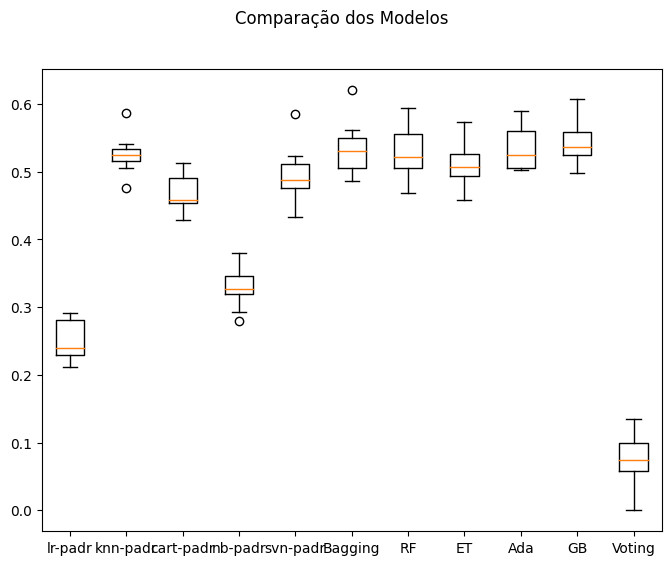

In [ ]:
# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))
# Listas para armazenar os resultados
results = []
names = []
# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:%f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(8,6))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels (names)
plt.show()

#Modelagem e treinamento:

Objetivo: construir modelos para resolver o problema em questão.

- Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.

Escolhi os algoritmos indicados para problemas de classificação binaria como SVC, Logistic Regression, Naive Bayes e Decision Trees além de outros dados em aula

- Há algum ajuste inicial para os hiperparâmetros?

Utilizei o gridsearch para otimizacao dos hiperparametros

- O modelo foi devidamente treinado? Foi observado problema de underfitting?

No modelo final escolhido nao houve problema de underfittig

- É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.

Sim, comparei diferentes nivels de k para o KNN

- Há algum método avançado ou mais complexo que possa ser avaliado?


- Posso criar um comitê de modelos diferentes para o problema (ensembles)?

Sim, foi feito.


In [ ]:

np.random.seed(7) # definindo uma semente global para este bloco
# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []
# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log= ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB' , GaussianNB())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting= ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))
# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

In [ ]:
# Montando os pipelines
# Dataset original
pipelines.append(('LR-orig', Pipeline ([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline ([random_forest])))
pipelines.append(('ET-orig', Pipeline ([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline ([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

#Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline ([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline ([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

LR-orig:0.094 (0.055)
KNN-orig:0.150 (0.030)
CART-orig:0.468 (0.027)
NB-orig:0.123 (0.030)
SVM-orig:0.000 (0.000)
Bag-orig:0.534 (0.037)
RF-orig:0.529 (0.035)
ET-orig:0.510 (0.030)
Ada-orig:0.534 (0.031)
GB-orig:0.542 (0.029)
Vot-orig:0.073 (0.045)
LR-padr:0.251 (0.029)
KNN-padr:0.525 (0.027)
CART-padr:0.467 (0.025)
NB-padr:0.331 (0.030)
SVM-padr:0.495 (0.039)
Bag-padr:0.530 (0.034)
RF-padr:0.526 (0.039)
ET-padr:0.517 (0.036)
Ada-padr:0.534 (0.031)
GB-padr:0.542 (0.029)
Vot-padr:0.464 (0.038)
LR-norm:0.238 (0.030)
KNN-norm:0.507 (0.028)
CART-norm:0.465 (0.026)
NB-norm:0.331 (0.030)
SVM-norm:0.480 (0.038)
Bag-norm:0.528 (0.034)
RF-norm:0.532 (0.039)
ET-norm:0.514 (0.038)
Ada-norm:0.534 (0.031)
GB-norm:0.542 (0.029)
Vot-norm:0.453 (0.037)


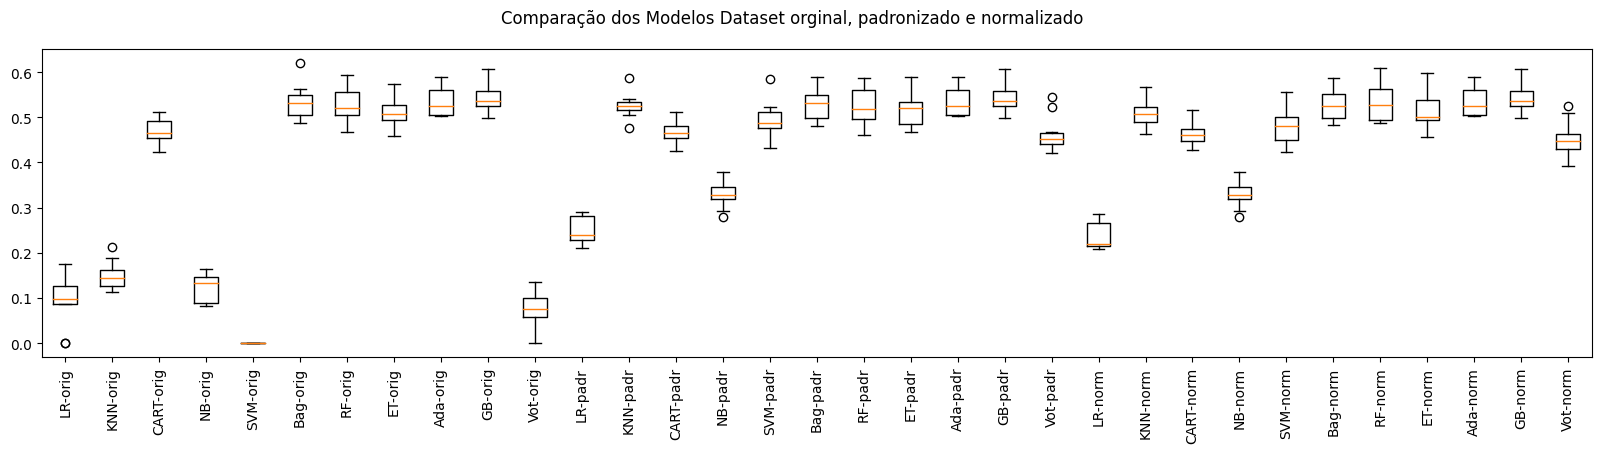

In [ ]:
# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline ([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline ([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline ([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline ([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline ([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline ([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:%.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(20,4))
fig.suptitle('Comparação dos Modelos Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot (results)
ax.set_xticklabels (names, rotation=90)
plt.show()

In [ ]:

# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco
pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
pipelines.append(('knn-orig', Pipeline (steps=[knn])))
pipelines.append(('knn-padr', Pipeline (steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline (steps=[min_max_scaler, knn])))
param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],

}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig Melhor: 0.273711 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr Melhor: 0.530724 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 7}
Sem tratamento de missings: knn-norm Melhor: 0.512624 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 7}


In [ ]:
# Avaliação do modelo com o conjunto de testes
# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform (X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression (max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print (accuracy_score (y_test, predictions))

0.8095


# Avaliação de Resultados:

- Objetivo: analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)

o modelo final empregado para os dados de teste apresentou f1-score de 0.89, nivel considerado alto

- Selecione as métricas de avaliação condizentes com o problema, justificando.

Escolhi o F1-Score pq o dataset possui algum nivel de desbalanceamento, 0,2 vs 0,8

- Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.

Foi feito

- Os resultados fazem sentido?

sim

- Foi observado algum problema de overfitting?

Não, os dados de treino nao foram melhores que o de teste

- Compare os resultados de diferentes modelos.

Resultados foram muito dispersos, foram testado muitos modelos com variacoes de padronizaçao e normalizacao

- Descreva a melhor solução encontrada, justificando.

O modelo de LOgistic regression entreou um F1-score de 0,89 nos dados de teste.
